In [20]:
import findspark
findspark.init()

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (20,7)

In [22]:
from pyspark.sql import SQLContext
from pyspark import Row
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql import Row

In [23]:
import pyspark
sc = pyspark.SparkContext('local[*]')
txt = sc.textFile('/Users/praveen/Big-Data/Project/flights.csv')
sqlContext= SQLContext(sc)

In [24]:
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true').load('/Users/praveen/Big-Data/Project/flights.csv')

In [25]:
df = sqlContext.read.load('/Users/praveen/Big-Data/Project/flights.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [26]:
df.count()

5819079

In [27]:
df.head()

Row(YEAR=2015, MONTH=1, DAY=1, DAY_OF_WEEK=4, AIRLINE='AS', FLIGHT_NUMBER=98, TAIL_NUMBER='N407AS', ORIGIN_AIRPORT='ANC', DESTINATION_AIRPORT='SEA', SCHEDULED_DEPARTURE=5, DEPARTURE_TIME=2354, DEPARTURE_DELAY=-11, TAXI_OUT=21, WHEELS_OFF=15, SCHEDULED_TIME=205, ELAPSED_TIME=194, AIR_TIME=169, DISTANCE=1448, WHEELS_ON=404, TAXI_IN=4, SCHEDULED_ARRIVAL=430, ARRIVAL_TIME=408, ARRIVAL_DELAY=-22, DIVERTED=0, CANCELLED=0, CANCELLATION_REASON=None, AIR_SYSTEM_DELAY=None, SECURITY_DELAY=None, AIRLINE_DELAY=None, LATE_AIRCRAFT_DELAY=None, WEATHER_DELAY=None)

In [28]:
df.dtypes

[('YEAR', 'int'),
 ('MONTH', 'int'),
 ('DAY', 'int'),
 ('DAY_OF_WEEK', 'int'),
 ('AIRLINE', 'string'),
 ('FLIGHT_NUMBER', 'int'),
 ('TAIL_NUMBER', 'string'),
 ('ORIGIN_AIRPORT', 'string'),
 ('DESTINATION_AIRPORT', 'string'),
 ('SCHEDULED_DEPARTURE', 'int'),
 ('DEPARTURE_TIME', 'int'),
 ('DEPARTURE_DELAY', 'int'),
 ('TAXI_OUT', 'int'),
 ('WHEELS_OFF', 'int'),
 ('SCHEDULED_TIME', 'int'),
 ('ELAPSED_TIME', 'int'),
 ('AIR_TIME', 'int'),
 ('DISTANCE', 'int'),
 ('WHEELS_ON', 'int'),
 ('TAXI_IN', 'int'),
 ('SCHEDULED_ARRIVAL', 'int'),
 ('ARRIVAL_TIME', 'int'),
 ('ARRIVAL_DELAY', 'int'),
 ('DIVERTED', 'int'),
 ('CANCELLED', 'int'),
 ('CANCELLATION_REASON', 'string'),
 ('AIR_SYSTEM_DELAY', 'int'),
 ('SECURITY_DELAY', 'int'),
 ('AIRLINE_DELAY', 'int'),
 ('LATE_AIRCRAFT_DELAY', 'int'),
 ('WEATHER_DELAY', 'int')]

In [29]:
from pyspark.sql.functions import *



In [30]:
df.createOrReplaceTempView("people")

sqlDF = sqlContext.sql("SELECT * FROM people limit 1")
sqlDF.show()

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

In [31]:
df_flight = df.select(df['YEAR'], df['MONTH'],df['DAY'] ,df['DAY_OF_WEEK'] , df['AIRLINE'] ,df['ORIGIN_AIRPORT'],df['DESTINATION_AIRPORT'] ,df['SCHEDULED_DEPARTURE'],df['DEPARTURE_TIME'],df['DEPARTURE_DELAY'],df['ARRIVAL_TIME'],df['ARRIVAL_DELAY'],df['CANCELLED'])
df_flight.show(15, truncate=False)

+----+-----+---+-----------+-------+--------------+-------------------+-------------------+--------------+---------------+------------+-------------+---------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|ARRIVAL_TIME|ARRIVAL_DELAY|CANCELLED|
+----+-----+---+-----------+-------+--------------+-------------------+-------------------+--------------+---------------+------------+-------------+---------+
|2015|1    |1  |4          |AS     |ANC           |SEA                |5                  |2354          |-11            |408         |-22          |0        |
|2015|1    |1  |4          |AA     |LAX           |PBI                |10                 |2             |-8             |741         |-9           |0        |
|2015|1    |1  |4          |US     |SFO           |CLT                |20                 |18            |-2             |811         |5            |0        |
|2015|1    |1  |4          |AA     |LAX 

In [32]:
df_flight.createOrReplaceTempView("flight_1")

sqlDF = sqlContext.sql("SELECT * FROM flight_1 limit 1")
sqlDF.show()

+----+-----+---+-----------+-------+--------------+-------------------+-------------------+--------------+---------------+------------+-------------+---------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|ARRIVAL_TIME|ARRIVAL_DELAY|CANCELLED|
+----+-----+---+-----------+-------+--------------+-------------------+-------------------+--------------+---------------+------------+-------------+---------+
|2015|    1|  1|          4|     AS|           ANC|                SEA|                  5|          2354|            -11|         408|          -22|        0|
+----+-----+---+-----------+-------+--------------+-------------------+-------------------+--------------+---------------+------------+-------------+---------+



# What would be the best day of the week the day the passenger can choose to fly so that he/she can avoid delays in their journeys?

In [33]:
# This is used to analyse the average delay time for each day of the week
sqlDF1 = sqlContext.sql("SELECT DAY_OF_WEEK ,avg(DEPARTURE_DELAY) FROM flight_1 WHERE DEPARTURE_DELAY > 0 GROUP BY DAY_OF_WEEK ORDER BY DAY_OF_WEEK   ")
sqlDF1.show()

+-----------+--------------------+
|DAY_OF_WEEK|avg(DEPARTURE_DELAY)|
+-----------+--------------------+
|          1|   35.29113493909654|
|          2|   33.79152860987517|
|          3|  32.064168899565736|
|          4|   32.36675169788299|
|          5|  31.244123389063574|
|          6|  31.288367895222905|
|          7|   32.36801816735181|
+-----------+--------------------+



In [34]:
Day_of_the_week = sqlDF1.toPandas()
Day_of_the_week.reset_index(drop=True, inplace=True)
Day_of_the_week

,DAY_OF_WEEK,avg(DEPARTURE_DELAY)
0,1,35.291135
1,2,33.791529
2,3,32.064169
3,4,32.366752
4,5,31.244123
5,6,31.288368
6,7,32.368018


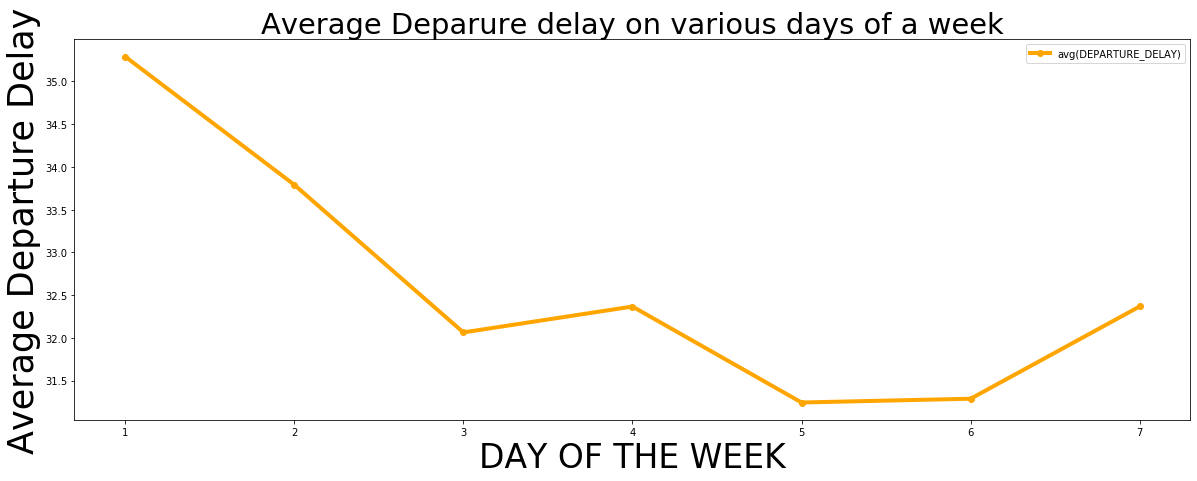

In [35]:
plt.plot( 'DAY_OF_WEEK', 'avg(DEPARTURE_DELAY)', data=Day_of_the_week, marker='o', markerfacecolor='orange', color='orange', linewidth=4)
plt.legend()
plt.xlabel("DAY OF THE WEEK", fontsize = 33)
plt.ylabel("Average Departure Delay" , fontsize =35)
plt.title("Average Deparure delay on various days of a week" , fontsize =29)
plt.show()


In [74]:
Day_of_the_week= Day_of_the_week.to_json()
Day_of_the_week
from bson import json_util
data = json_util.loads(Day_of_the_week)

In [75]:
import pymongo 
mng_client = pymongo.MongoClient('localhost', 27017)
mng_db = mng_client['dataexpo'] 
collection_name = 'flights_departure_delay'
db_cm = mng_db[collection_name]
 
#Insert Data
db_cm.insert(data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


ObjectId('5e9a61227cff8d32698affad')

In [ ]:
print(mng_client.list_database_names())

In [77]:
#Printing the Collections
for coll in mng_db.list_collection_names():
    print(coll)

delay
cancel
flights_departure_delay
busyroutes


# Analysis of the Most busiest routes in USA 

In [37]:
# This is used to analyse the top 20 busiest routes in USA and the number of flights travelled in a Year
sqlDF4 = sqlContext.sql("SELECT  ORIGIN_AIRPORT , DESTINATION_AIRPORT , count(*) FROM flight_1 GROUP BY ORIGIN_AIRPORT ,DESTINATION_AIRPORT ORDER BY count(*) DESC  ")
sqlDF4.show()

+--------------+-------------------+--------+
|ORIGIN_AIRPORT|DESTINATION_AIRPORT|count(1)|
+--------------+-------------------+--------+
|           SFO|                LAX|   13744|
|           LAX|                SFO|   13457|
|           JFK|                LAX|   12016|
|           LAX|                JFK|   12015|
|           LAS|                LAX|    9715|
|           LGA|                ORD|    9639|
|           LAX|                LAS|    9594|
|           ORD|                LGA|    9575|
|           SFO|                JFK|    8440|
|           JFK|                SFO|    8437|
|           OGG|                HNL|    8313|
|           HNL|                OGG|    8282|
|           LAX|                ORD|    8256|
|           ATL|                LGA|    8234|
|           LGA|                ATL|    8215|
|           ATL|                MCO|    8202|
|           MCO|                ATL|    8202|
|           SFO|                LAS|    7995|
|           ORD|                LA

In [58]:
BUSY_ROUTES = sqlDF4.toPandas()
BUSY_ROUTES.reset_index(drop=True, inplace=True)
BUSY_ROUTES.head(20)

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,count(1)
0,SFO,LAX,13744
1,LAX,SFO,13457
2,JFK,LAX,12016
3,LAX,JFK,12015
4,LAS,LAX,9715
5,LGA,ORD,9639
6,LAX,LAS,9594
7,ORD,LGA,9575
8,SFO,JFK,8440
9,JFK,SFO,8437


In [64]:
BUSY_ROUTES_Json= BUSY_ROUTES.to_json(orient= 'records')
BUSY_ROUTES_Json

'[{"ORIGIN_AIRPORT":"SFO","DESTINATION_AIRPORT":"LAX","count(1)":13744},{"ORIGIN_AIRPORT":"LAX","DESTINATION_AIRPORT":"SFO","count(1)":13457},{"ORIGIN_AIRPORT":"JFK","DESTINATION_AIRPORT":"LAX","count(1)":12016},{"ORIGIN_AIRPORT":"LAX","DESTINATION_AIRPORT":"JFK","count(1)":12015},{"ORIGIN_AIRPORT":"LAS","DESTINATION_AIRPORT":"LAX","count(1)":9715},{"ORIGIN_AIRPORT":"LGA","DESTINATION_AIRPORT":"ORD","count(1)":9639},{"ORIGIN_AIRPORT":"LAX","DESTINATION_AIRPORT":"LAS","count(1)":9594},{"ORIGIN_AIRPORT":"ORD","DESTINATION_AIRPORT":"LGA","count(1)":9575},{"ORIGIN_AIRPORT":"SFO","DESTINATION_AIRPORT":"JFK","count(1)":8440},{"ORIGIN_AIRPORT":"JFK","DESTINATION_AIRPORT":"SFO","count(1)":8437},{"ORIGIN_AIRPORT":"OGG","DESTINATION_AIRPORT":"HNL","count(1)":8313},{"ORIGIN_AIRPORT":"HNL","DESTINATION_AIRPORT":"OGG","count(1)":8282},{"ORIGIN_AIRPORT":"LAX","DESTINATION_AIRPORT":"ORD","count(1)":8256},{"ORIGIN_AIRPORT":"ATL","DESTINATION_AIRPORT":"LGA","count(1)":8234},{"ORIGIN_AIRPORT":"LGA","DES

In [60]:
from bson import json_util
data = json_util.loads(BUSY_ROUTES_Json)

In [61]:
import pymongo 
mng_client = pymongo.MongoClient('localhost', 27017)
mng_db = mng_client['dataexpo'] 
collection_name = 'busyroutes'
db_cm = mng_db[collection_name]
 
#Insert Data
db_cm.insert(data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('5e9a5ef77cff8d32698addef'),
 ObjectId('5e9a5ef77cff8d32698addf0'),
 ObjectId('5e9a5ef77cff8d32698addf1'),
 ObjectId('5e9a5ef77cff8d32698addf2'),
 ObjectId('5e9a5ef77cff8d32698addf3'),
 ObjectId('5e9a5ef77cff8d32698addf4'),
 ObjectId('5e9a5ef77cff8d32698addf5'),
 ObjectId('5e9a5ef77cff8d32698addf6'),
 ObjectId('5e9a5ef77cff8d32698addf7'),
 ObjectId('5e9a5ef77cff8d32698addf8'),
 ObjectId('5e9a5ef77cff8d32698addf9'),
 ObjectId('5e9a5ef77cff8d32698addfa'),
 ObjectId('5e9a5ef77cff8d32698addfb'),
 ObjectId('5e9a5ef77cff8d32698addfc'),
 ObjectId('5e9a5ef77cff8d32698addfd'),
 ObjectId('5e9a5ef77cff8d32698addfe'),
 ObjectId('5e9a5ef77cff8d32698addff'),
 ObjectId('5e9a5ef77cff8d32698ade00'),
 ObjectId('5e9a5ef77cff8d32698ade01'),
 ObjectId('5e9a5ef77cff8d32698ade02'),
 ObjectId('5e9a5ef77cff8d32698ade03'),
 ObjectId('5e9a5ef77cff8d32698ade04'),
 ObjectId('5e9a5ef77cff8d32698ade05'),
 ObjectId('5e9a5ef77cff8d32698ade06'),
 ObjectId('5e9a5ef77cff8d32698ade07'),
 ObjectId('5e9a5ef77cff8d

In [62]:
print(mng_client.list_database_names())

['UNSdatabase', 'admin', 'config', 'dataexpo', 'forestfires', 'local', 'mydatabase', 'users']


In [78]:
#Printing the Collections
for coll in mng_db.list_collection_names():
    print(coll)

delay
cancel
flights_departure_delay
busyroutes


# Analysing the best Airline one can choose based on the past data.This will help the passenger to get rid of delays and last minute flight cancellations.

In [42]:
# This is used to analyse the average delays by airline , number of times the flight got cancelled in a year
sqlDF2 = sqlContext.sql("SELECT AIRLINE ,avg(DEPARTURE_DELAY), sum(CANCELLED)/12 FROM flight_1 WHERE DEPARTURE_DELAY > 0 GROUP BY AIRLINE ORDER BY avg(DEPARTURE_DELAY)   ")
sqlDF2.show()

+-------+--------------------+---------------------------------------------------------------------+
|AIRLINE|avg(DEPARTURE_DELAY)|(CAST(sum(CAST(CANCELLED AS BIGINT)) AS DOUBLE) / CAST(12 AS DOUBLE))|
+-------+--------------------+---------------------------------------------------------------------+
|     HA|  16.844038518812667|                                                                  0.5|
|     AS|  26.045976219988063|                                                   2.0833333333333335|
|     WN|   26.95237708779179|                                                   18.666666666666668|
|     US|  28.500615360025574|                                                    9.416666666666666|
|     DL|   29.68744224907333|                                                                  6.5|
|     VX|  30.285983147268915|                                                   1.0833333333333333|
|     UA|   32.60218281036835|                                                             

In [43]:
Airline_Delay = sqlDF2.toPandas()


In [44]:
Airline_Delay.columns = ['Airline','Avg_Departure_Delay','No_Of_Cancellations']
Airline_Delay.reset_index(drop=True, inplace=True)
Airline_Delay

,Airline,Avg_Departure_Delay,No_Of_Cancellations
0,HA,16.844039,0.500000
1,AS,26.045976,2.083333
2,WN,26.952377,18.666667
3,US,28.500615,9.416667
4,DL,29.687442,6.500000
5,VX,30.285983,1.083333
6,UA,32.602183,25.750000
7,AA,34.370397,29.500000
8,B6,37.617121,4.083333
9,OO,39.203279,32.583333


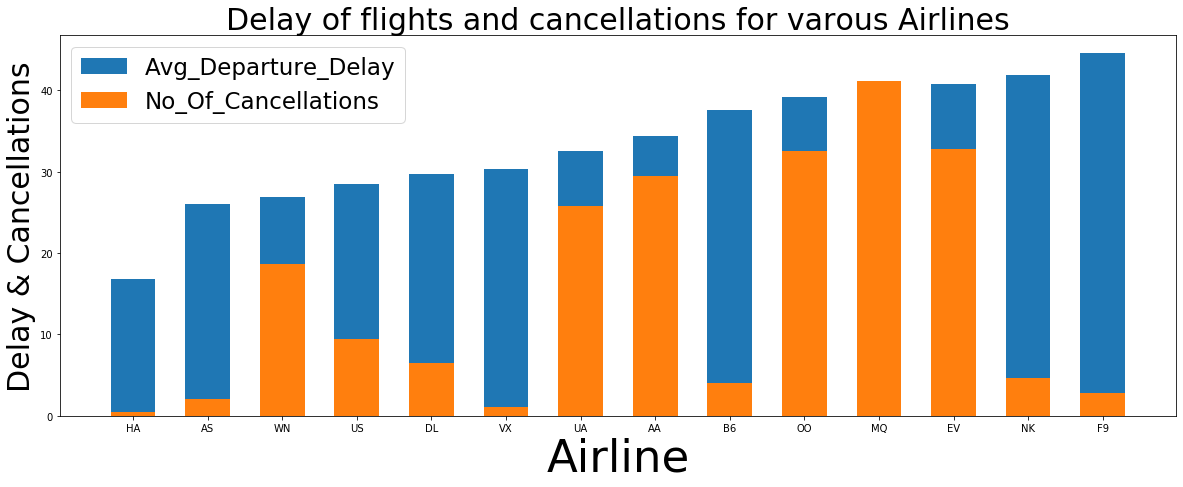

In [45]:
p1=plt.bar('Airline', 'Avg_Departure_Delay' ,width =0.6,data = Airline_Delay )
p2=plt.bar('Airline', 'No_Of_Cancellations' ,width =0.6,data = Airline_Delay )
plt.xlabel('Airline', fontsize=45)
plt.ylabel('Delay & Cancellations', fontsize=30)
plt.title('Delay of flights and cancellations for varous Airlines',   fontsize =30)
plt.legend((p1[0], p2[0]), ('Avg_Departure_Delay', 'No_Of_Cancellations'),prop={"size":23})


In [66]:
Airline_delay_Json= Airline_Delay.to_json(orient= 'records')

In [67]:
from bson import json_util
data = json_util.loads(Airline_delay_Json)

In [68]:
import pymongo 
mng_client = pymongo.MongoClient('localhost', 27017)
mng_db = mng_client['dataexpo'] 
collection_name = 'delay'
db_cm = mng_db[collection_name]
 
#Insert Data
db_cm.insert(data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('5e9a60687cff8d32698aff91'),
 ObjectId('5e9a60687cff8d32698aff92'),
 ObjectId('5e9a60687cff8d32698aff93'),
 ObjectId('5e9a60687cff8d32698aff94'),
 ObjectId('5e9a60687cff8d32698aff95'),
 ObjectId('5e9a60687cff8d32698aff96'),
 ObjectId('5e9a60687cff8d32698aff97'),
 ObjectId('5e9a60687cff8d32698aff98'),
 ObjectId('5e9a60687cff8d32698aff99'),
 ObjectId('5e9a60687cff8d32698aff9a'),
 ObjectId('5e9a60687cff8d32698aff9b'),
 ObjectId('5e9a60687cff8d32698aff9c'),
 ObjectId('5e9a60687cff8d32698aff9d'),
 ObjectId('5e9a60687cff8d32698aff9e')]

In [46]:
sqlDF3 = sqlContext.sql("SELECT AIRLINE , sum(CANCELLED) FROM flight_1 WHERE DEPARTURE_DELAY > 0 GROUP BY AIRLINE ORDER BY sum(CANCELLED)   ")
sqlDF3.show()

+-------+--------------+
|AIRLINE|sum(CANCELLED)|
+-------+--------------+
|     HA|             6|
|     VX|            13|
|     AS|            25|
|     F9|            34|
|     B6|            49|
|     NK|            56|
|     DL|            78|
|     US|           113|
|     WN|           224|
|     UA|           309|
|     AA|           354|
|     OO|           391|
|     EV|           394|
|     MQ|           494|
+-------+--------------+



In [47]:
Cancellation_count = sqlDF3.toPandas()
Cancellation_count.reset_index(drop=True, inplace=True)
Cancellation_count

,AIRLINE,sum(CANCELLED)
0,HA,6
1,VX,13
2,AS,25
3,F9,34
4,B6,49
5,NK,56
6,DL,78
7,US,113
8,WN,224
9,UA,309


In [48]:
sqlDF5 = sqlContext.sql("SELECT AIRLINE ,avg(DEPARTURE_DELAY) FROM flight_1 WHERE DEPARTURE_DELAY > 0 GROUP BY AIRLINE ORDER BY avg(DEPARTURE_DELAY)   ")
sqlDF5.show()

+-------+--------------------+
|AIRLINE|avg(DEPARTURE_DELAY)|
+-------+--------------------+
|     HA|  16.844038518812667|
|     AS|  26.045976219988063|
|     WN|   26.95237708779179|
|     US|  28.500615360025574|
|     DL|   29.68744224907333|
|     VX|  30.285983147268915|
|     UA|   32.60218281036835|
|     AA|  34.370396577526186|
|     B6|    37.6171211334398|
|     OO|   39.20327908982818|
|     MQ|   40.16399931715853|
|     EV|  40.840515135641006|
|     NK|  41.924149052583076|
|     F9|   44.54076748918121|
+-------+--------------------+



In [49]:
DEPARTURE_DELAY = sqlDF5.toPandas()
DEPARTURE_DELAY.reset_index(drop=True, inplace=True)
DEPARTURE_DELAY

,AIRLINE,avg(DEPARTURE_DELAY)
0,HA,16.844039
1,AS,26.045976
2,WN,26.952377
3,US,28.500615
4,DL,29.687442
5,VX,30.285983
6,UA,32.602183
7,AA,34.370397
8,B6,37.617121
9,OO,39.203279


# Analysis of which month has highest number of cancellations, which helps the passangers in planning their Journey

In [50]:
# This is used to analyse the number of times teh flights got cancelled in a month
sqlDF6 = sqlContext.sql("SELECT MONTH, (sum(case when CANCELLED  in (1) then 1 end)/sum(case when CANCELLED  in (1,0) then 1 end)) *100 FROM flight_1 GROUP BY MONTH ORDER By MONTH ")
sqlDF6.show()

+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|MONTH|((CAST(sum(CAST(CASE WHEN (CANCELLED IN (1)) THEN 1 END AS BIGINT)) AS DOUBLE) / CAST(sum(CAST(CASE WHEN (CANCELLED IN (1, 0)) THEN 1 END AS BIGINT)) AS DOUBLE)) * CAST(100 AS DOUBLE))|
+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    1|                                                                                                                                                                      2.5495352875089368|
|    2|                                                                                                                                                                       4.780389150751064|
|    3|                            

In [51]:
cancellation = sqlDF6.toPandas()

In [52]:
cancellation

,MONTH,"((CAST(sum(CAST(CASE WHEN (CANCELLED IN (1)) THEN 1 END AS BIGINT)) AS DOUBLE) / CAST(sum(CAST(CASE WHEN (CANCELLED IN (1, 0)) THEN 1 END AS BIGINT)) AS DOUBLE)) * CAST(100 AS DOUBLE))"
0,1,2.549535
1,2,4.780389
2,3,2.181586
3,4,0.931669
4,5,1.145690
5,6,1.809894
6,7,0.922956
7,8,0.989548
8,9,0.446288
9,10,0.504767


In [53]:
#Renaming the column name 
cancellation.columns = ['Month', 'Chances of Flight getting cancelled'] 

In [54]:
cancellation.reset_index(drop=True, inplace=True)
cancellation


,Month,Chances of Flight getting cancelled
0,1,2.549535
1,2,4.780389
2,3,2.181586
3,4,0.931669
4,5,1.145690
5,6,1.809894
6,7,0.922956
7,8,0.989548
8,9,0.446288
9,10,0.504767


Text(0.5, 1.0, '% of flights got cancelled by Month wise')

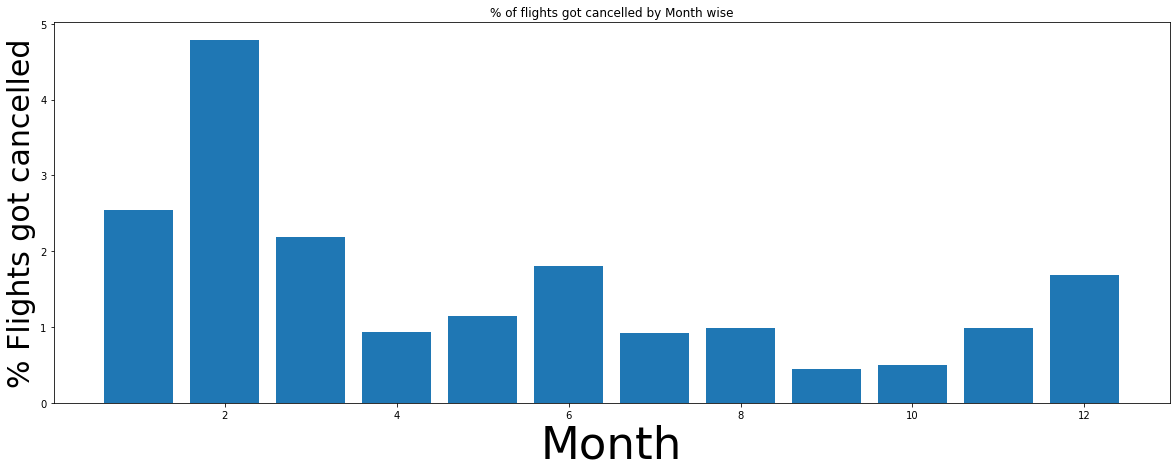

In [55]:
plt.bar('Month', 'Chances of Flight getting cancelled' ,width =0.8, data = cancellation )
plt.xlabel('Month', fontsize=45)
plt.ylabel('% Flights got cancelled', fontsize=30)
plt.title('% of flights got cancelled by Month wise')


In [79]:
cancellation_Json= cancellation.to_json(orient= 'records')

In [80]:
from bson import json_util
data = json_util.loads(cancellation_Json)

In [81]:
import pymongo 
mng_client = pymongo.MongoClient('localhost', 27017)
mng_db = mng_client['dataexpo'] 
collection_name = 'cancel'
db_cm = mng_db[collection_name]
 
#Insert Data
db_cm.insert(data)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('5e9a62097cff8d32698affaf'),
 ObjectId('5e9a62097cff8d32698affb0'),
 ObjectId('5e9a62097cff8d32698affb1'),
 ObjectId('5e9a62097cff8d32698affb2'),
 ObjectId('5e9a62097cff8d32698affb3'),
 ObjectId('5e9a62097cff8d32698affb4'),
 ObjectId('5e9a62097cff8d32698affb5'),
 ObjectId('5e9a62097cff8d32698affb6'),
 ObjectId('5e9a62097cff8d32698affb7'),
 ObjectId('5e9a62097cff8d32698affb8'),
 ObjectId('5e9a62097cff8d32698affb9'),
 ObjectId('5e9a62097cff8d32698affba')]